<a href="https://colab.research.google.com/github/Bocampagni/Applied-mathematics/blob/master/clustering/poverty_mpi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying mathematical analyses in order to make a MPI.

Fábio Alves Bocampagni

What is the Multidimensional Poverty Measure? An index that captures the percentage of households in a country deprived along three dimensions of well-being – monetary poverty, education, and basic infrastructure services – to provide a more complete picture of poverty.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("/amostra_pessoa.csv")

#Creating a sampling sub group, to gather only information that will be used.

cad_unico = data[['id_familia',
                  'id_pessoa',
                  'cod_sexo_pessoa',
                  'idade',
                  'cod_raca_cor_pessoa',
                  'cod_deficiencia_memb',
                  'cod_sabe_ler_escrever_memb',
                  'val_renda_bruta_12_meses_memb',
                  'val_remuner_emprego_memb']].copy()

#Avoiding null values in important fields
cad_unico = cad_unico.dropna(how='any',axis=0) 

cad_unico


,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_raca_cor_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,val_renda_bruta_12_meses_memb,val_remuner_emprego_memb
0,1555504,1,2,44,1.0,2,1.0,3840.0,320.0
6,4963019,7,2,35,4.0,2,1.0,12564.0,1047.0
7,3407990,8,2,27,2.0,2,1.0,2400.0,200.0
15,69894,16,2,17,1.0,2,1.0,1920.0,160.0
21,2565641,22,2,36,1.0,2,1.0,15600.0,1300.0
...,...,...,...,...,...,...,...,...,...
272980,1063112,272981,1,56,1.0,2,2.0,1000.0,0.0
272987,3157913,272988,2,32,4.0,2,1.0,2400.0,200.0
272993,4118022,272994,2,23,4.0,2,1.0,600.0,50.0
273003,5102026,273004,2,47,4.0,2,1.0,2224.0,150.0


# Money as a vector of wealth

After the data cleaning, we can finally dive into the analyses itself. Let us first understand the sampling financial information, in other words, the amount of money per person. 


In [104]:
cad_unico['val_renda_bruta_12_meses_memb'].max()

96000.0

As we can see, if we **only** look at the amount money received in the span of a year, the highest record in the sampling would be considered a wealthy person if compared to the mean of its country (R$ 30.840).

We can not say otherwise (the lowest entry is a poor person), due to the fact that there are people in the sampling that are underage or retired, therefore, they have no jobs or the money they have come from different resources, like donating or retirement.

In fact, in order to ensure that the sampling do not have distant values, we can calculate the standard deviation of it, in order to analyse how much the values differ from its mean.

Let us first see what is the mean of what people receive

In [105]:
int(cad_unico['val_renda_bruta_12_meses_memb'].mean())


5005

Then, we calculate the standard deviation

In [106]:
int(cad_unico['val_renda_bruta_12_meses_memb'].std())

5546

As we can see, the values are not that far from eachother. Over the period of a year, this would represent a monthly gap of R$ 462, on average.

# Education as a vector of wealth

We can stablish a correlation between a well educated person with the amount of money it receveis.

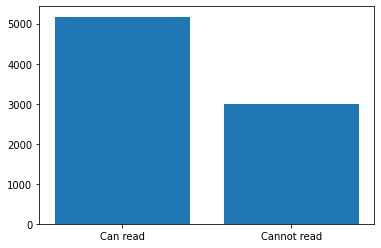

In [108]:

#Creating a subset gathered by the either the person can read
reading_capacity_group = cad_unico[['cod_sabe_ler_escrever_memb','val_renda_bruta_12_meses_memb']].groupby('cod_sabe_ler_escrever_memb')

groups = [reading_capacity_group.get_group(x) for x in reading_capacity_group.groups]

#Taking the mean salary based on the previous subset 
can_read_salary_mean = groups[0]['val_renda_bruta_12_meses_memb'].mean()
cannot_read_salary_mean = groups[1]['val_renda_bruta_12_meses_memb'].mean()

# Plotting the correlation
means = [can_read_salary_mean, cannot_read_salary_mean]
groups = ('Can read', 'Cannot read')
y_pos = np.arange(len(groups))
plt.bar(y_pos, means)
plt.xticks(y_pos, groups)
plt.show()

As we can see, the people who have the ability to read receive a greater amount of money per year.